In [ ]:
# 1.
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cardio = pd.read_csv("../Data/cardio_train.csv", sep=";")
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# 1.1 EDA
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# EDA
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


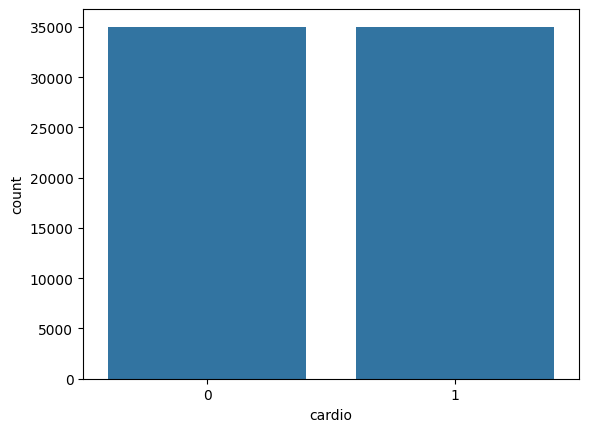

In [ ]:
# 1.1 a) Hjärtkärlsjukdom
# 1 = sjuk, 0 = frisk
cardio["cardio"].value_counts()

# plot Hjärtkärlsjukdom
sns.countplot(x="cardio", data=cardio)
# Make plot interactive with plotly, show data when hovering over bars


<Axes: xlabel='cardio', ylabel='count'>

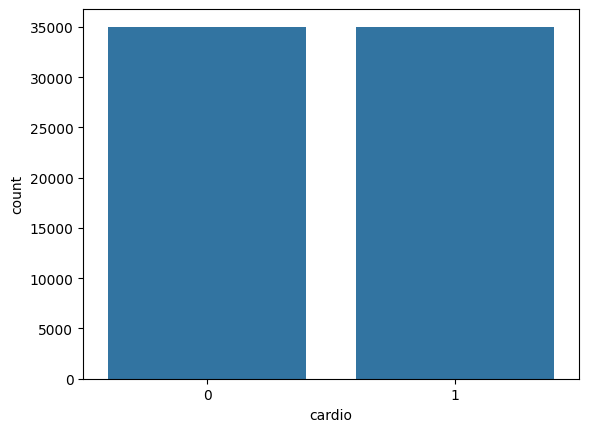

In [ ]:
# plot Hjärtkärlsjukdom
sns.countplot(x="cardio", data=cardio)

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64


<Axes: xlabel='cholesterol', ylabel='count'>

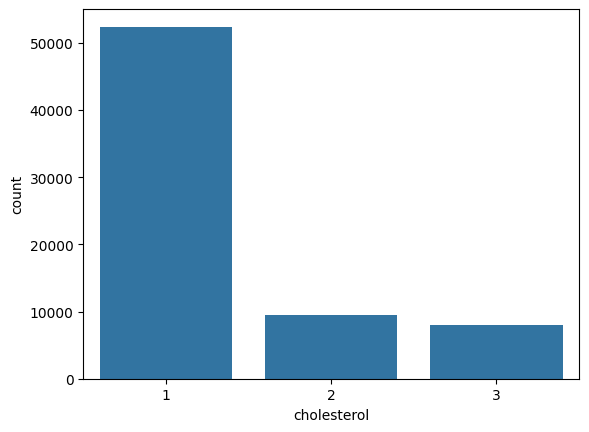

In [ ]:
# 1.1 b) Kolestrolvärden
# 1 = normal, 2 = över normal, 3 = långt över normal
print(cardio["cholesterol"].value_counts())

# plot kolstrolvärden
sns.countplot(x="cholesterol", data=cardio)

In [ ]:
# 1.1 c) Åldersfördelning
# Ålder i dagar
cardio["age"].describe()

# Ålder i år
cardio["age"] = cardio["age"] / 365
cardio["age"]


0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64

smoke
0    63831
1     6169
Name: count, dtype: int64


<Axes: xlabel='smoke', ylabel='count'>

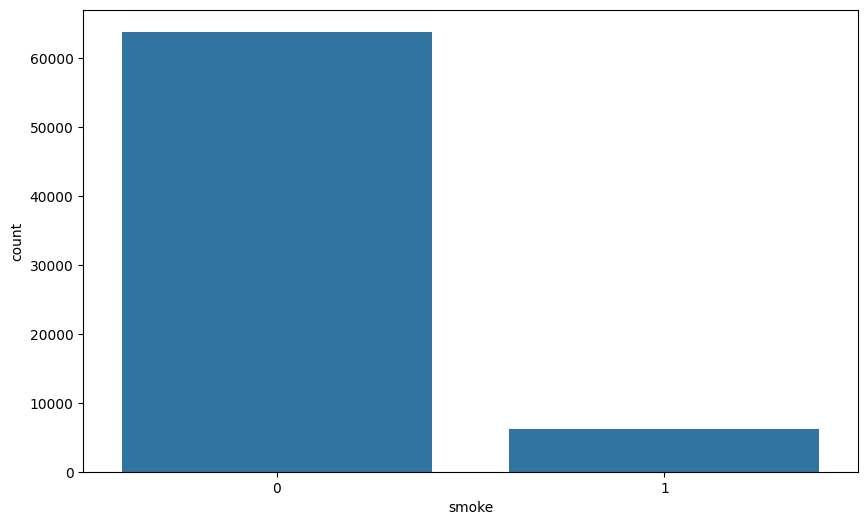

In [ ]:
# 1.1 d) Andel rökare
# 1 = rökare, 0 = icke-rökare
print(cardio["smoke"].value_counts())
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="smoke", data=cardio)

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64


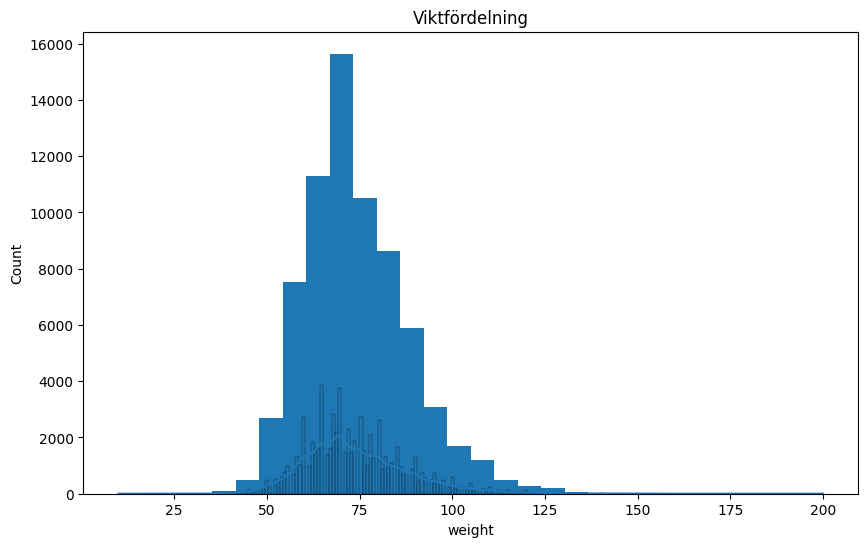

In [ ]:
# 1.1 e) Viktfördelning
# Vikt i kg
print(cardio["weight"].describe())

# Viktfördelning plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(cardio["weight"], bins=30)
sns.histplot(cardio["weight"], kde=True)
plt.title("Viktfördelning")
plt.show()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64


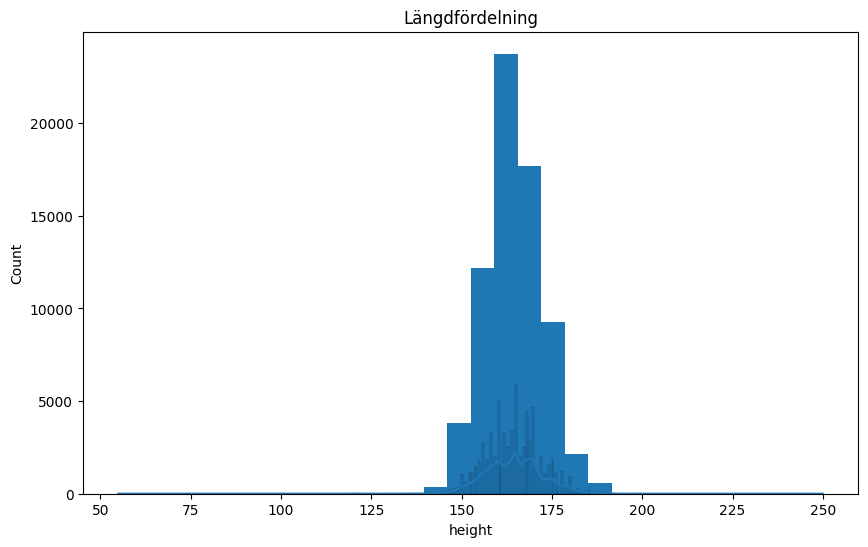

In [ ]:
# 1.1 f) Längdfördelning
# Längd i cm
print(cardio["height"].describe())

# Längdfördelning plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(cardio["height"], bins=30)
sns.histplot(cardio["height"], kde=True)
plt.title("Längdfördelning")
plt.show()

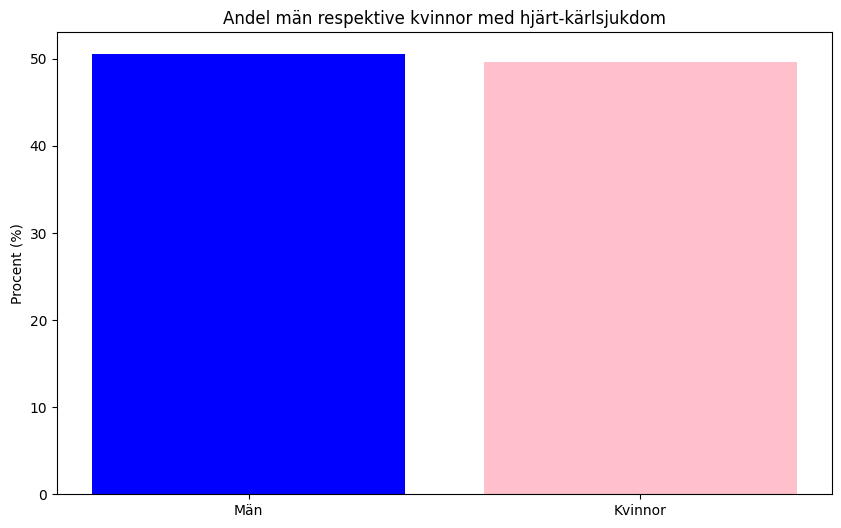

Andel män med hjärt-kärlsjukdom: 50.52%
Andel kvinnor med hjärt-kärlsjukdom: 49.67%


In [ ]:
# 1.1 g) Andel kvinnor reserpektive män med hjärtkärlsjukdom
# Plot andel kvinnor respektive män med hjärtkärlsjukdom
fig, ax = plt.subplots(figsize=(10, 6))

# Skapa en DataFrame från det givna datasetet
df = pd.DataFrame(cardio)

# Beräkna antalet män och kvinnor med hjärt-kärlsjukdom
num_men_with_cardio = df[(df['gender'] == 2) & (df['cardio'] == 1)].shape[0]
num_women_with_cardio = df[(df['gender'] == 1) & (df['cardio'] == 1)].shape[0]

# Beräkna totalt antal män och kvinnor
total_men = df[df['gender'] == 2].shape[0]
total_women = df[df['gender'] == 1].shape[0]

# Beräkna andel män och kvinnor med hjärt-kärlsjukdom
men_percentage = (num_men_with_cardio / total_men) * 100
women_percentage = (num_women_with_cardio / total_women) * 100

# Plot resultaten    
labels = ['Män', 'Kvinnor']
percentages = [men_percentage, women_percentage]
ax.bar(labels, percentages, color=['blue', 'pink'])
plt.title("Andel män respektive kvinnor med hjärt-kärlsjukdom")
plt.ylabel("Procent (%)")
plt.show()

print(f"Andel män med hjärt-kärlsjukdom: {men_percentage:.2f}%")
print(f"Andel kvinnor med hjärt-kärlsjukdom: {women_percentage:.2f}%")

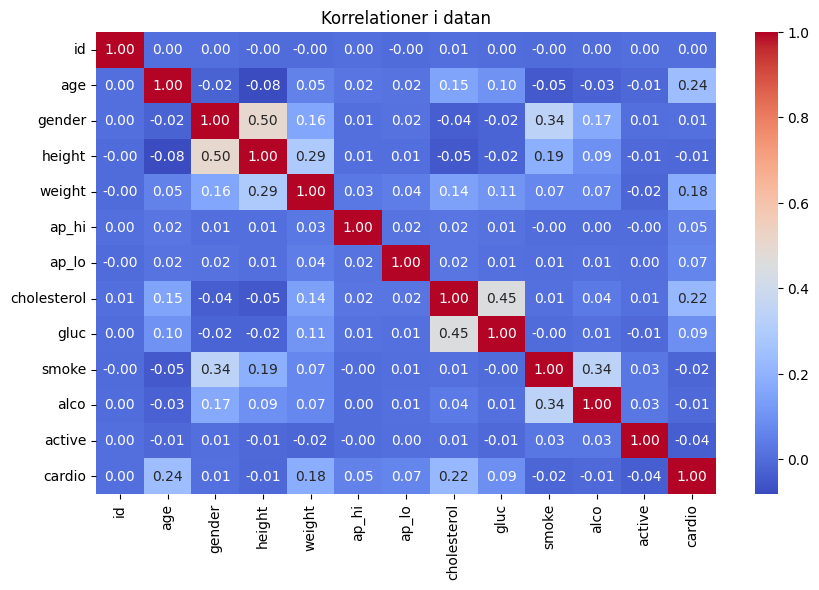

In [ ]:
# 1.2 Modelldesign
# Skapa heatmap av korrleationen i datan
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cardio.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationer i datan")
plt.show()

## Korrelationer i datan
* **Starka korrelationer i datan syns mellan:**
- gluc & cholesterol (glukos & kolesterol)
- cardio & cholesterol (hjärt-kärlsjukdom & kolesterol)
- smoke & alco (rökare & alkoholist)
- gender & height (kön & längd)
- weight & height (vikt & längd)
- smoke & gender (rökare & kön) 


In [ ]:
# 1.2.1 Feature scaling 
# a)
# Skapa en feature för BMI  
cardio["bmi"] = cardio["weight"] / (cardio["height"] / 100) ** 2
cardio["bmi"]

# Filtrera bort orimliga BMI-värden
cardio = cardio[(cardio["bmi"] >= 15) & (cardio["bmi"] <= 40)]



0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: bmi, Length: 70000, dtype: float64

# https://sv.wikipedia.org/wiki/BMI_(kroppsmasseindex)
To remove samples with unrealistic BMIs and outliers, we can define a reasonable range for BMI values based on medical guidelines or statistical analysis. Here's a general approach to determine the boundaries:

Medical Guidelines: Check if there are any established medical guidelines or standards for BMI ranges. For example, the World Health Organization (WHO) defines the following BMI categories:

Underweight: BMI < 18.5
Normal weight: 18.5 <= BMI < 25

In [ ]:
# 1.2.1 b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese (class II), obese (class III).
# BMI-kategorier
bmi_bins = [0, 18.5, 25, 30, 35, 40]
bmi_labels = ["Underweight", "Normal weight", "Overweight", "Obese (Class I)", "Obese (Class II)", "Obese (Class III)"]


In [ ]:
# 1.2.1 c) Undersök om kategorin är relevant, dvs dess korrelationer. Uppdatera data-analysen om du hittar något intressant.
# Skapa en kategorisk BMI-feature med kategorierna: underweight, normal weight, overweight, obese (class I), obese (class II), obese (class III).   
cardio["bmi_category"] = pd.cut(cardio["bmi"], bins=bmi_bins, labels=bmi_labels)
cardio["bmi_category"]


In [ ]:
# 1.2.1 Skapa en feature fr blodtryckskategorier enligt tabellen i denna artikel.
# Blodtryckskategorier
cardio["blood_pressure"] = 0
cardio.loc[(cardio["ap_lo"] <= 60) & (cardio["ap_hi"] <= 90), "blood_pressure"] = 1

# a) Släng bort samples med orimliga blodtryck och outliers. Likt förra uppgiften är det inte trivialt att sätta gränserna. Beskriv hur du kommer fram till gränserna.
# Filtrera bort orimliga blodtrycksvärden
cardio = cardio[(cardio["ap_lo"] >= 60) & (cardio["ap_lo"] <= 200) & (cardio["ap_hi"] >= 90) & (cardio["ap_hi"] <= 250)]

# b) Skapa en kategorisk feature med relevanta kategorier.
# Blodtryckskategorier
cardio["blood_pressure"] = 0
cardio.loc[(cardio["ap_lo"] <= 60) & (cardio["ap_hi"] <= 90), "blood_pressure"] = 1
cardio.loc[(cardio["ap_lo"] > 60) & (cardio["ap_lo"] <= 80) & (cardio["ap_hi"] > 90) & (cardio["ap_hi"] <= 120), "blood_pressure"] = 2
cardio.loc[(cardio["ap_lo"] > 80) & (cardio["ap_lo"] <= 90) & (cardio["ap_hi"] > 120) & (cardio["ap_hi"] <= 140), "blood_pressure"] = 3
cardio.loc[(cardio["ap_lo"] > 90) & (cardio["ap_lo"] <= 100) & (cardio["ap_hi"] > 140) & (cardio["ap_hi"] <= 160), "blood_pressure"] = 4
cardio.loc[(cardio["ap_lo"] > 100) & (cardio["ap_lo"] <= 120) & (cardio["ap_hi"] > 160) & (cardio["ap_hi"] <= 180), "blood_pressure"] = 5
cardio.loc[(cardio["ap_lo"] > 120) & (cardio["ap_lo"] <= 200) & (cardio["ap_hi"] > 180) & (cardio["ap_hi"] <= 250), "blood_pressure"] = 6

#c) Undersök om den nya kategorin är relevant, dvs har den någon nyttig korrelation? Uppdatera data-analysen om du hittar något intressant.
# Skapa en kategorisk feature för blodtryckskategorier
cardio["blood_pressure"] = 0
cardio.loc[(cardio["ap_lo"] <= 60) & (cardio["ap_hi"] <= 90), "blood_pressure"] = 1
cardio.loc[(cardio["ap_lo"] > 60) & (cardio["ap_lo"] <= 80) & (cardio["ap_hi"] > 90) & (cardio["ap_hi"] <= 120), "blood_pressure"] = 2



In [ ]:
# 1.2.2 a) Skapa en kopia av dataframe
# På ena dataframen: ta bort följande features: ap hi, ap lo, height, weight, BMI och gör one-hot encoding på BMI-kategori, blodtryckskategori samt kön
cardio_copy = cardio.copy()
cardio_copy.drop(columns=["ap_hi", "ap_lo", "height", "weight", "bmi", "bmi_category", "blood_pressure"], inplace=True)

# gör one-hot encoding på BMI-kategori, blodtryckskategori samt kön
cardio_copy = pd.get_dummies(cardio_copy, columns=["bmi_category", "blood_pressure", "gender"], drop_first=True)

# På andra dataframen: ta bort följande features: BMI-kategori, blodtryckskategori, height, weight och gör one-hot encoding på kön
cardio_copy2 = cardio.copy()
cardio_copy2.drop(columns=["bmi_category", "blood_pressure", "height", "weight"], inplace=True)

# gör one-hot encoding på kön
cardio_copy2 = pd.get_dummies(cardio.copy(), columns=["gender"])
